In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
data1 = pd.read_csv("C:/Users/jegan/Downloads/Miles_Traveled.csv")
data2 = pd.read_csv("C:/Users/jegan/Downloads/Alcohol_Sales.csv")

data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

In [8]:
data1['DATE'] = pd.to_datetime(data1['DATE'])  
data2['DATE'] = pd.to_datetime(data2['DATE'])  
data1.set_index('DATE', inplace=True)
data2.set_index('DATE', inplace=True)

In [9]:
def arima_forecast(data, order=(5, 1, 0)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=10)
    return forecast, model_fit

arima_forecast_data1, arima_model_data1 = arima_forecast(data1['TRFVOLUSM227NFWA'])
print(arima_forecast_data1)

C:\Users\jegan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jegan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jegan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2019-01-01    268593.104253
2019-02-01    262251.756237
2019-03-01    271115.300392
2019-04-01    263581.848056
2019-05-01    267413.297274
2019-06-01    266985.162194
2019-07-01    264960.122725
2019-08-01    267960.482372
2019-09-01    265377.576729
2019-10-01    266848.160224
Freq: MS, Name: predicted_mean, dtype: float64


In [10]:
def prophet_forecast(data):
    data.reset_index(inplace=True)
    data.columns = ['ds', 'y']
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=10)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']], model

prophet_forecast_data2, prophet_model_data2 = prophet_forecast(data2)
print(prophet_forecast_data2)

20:39:29 - cmdstanpy - INFO - Chain [1] start processing
20:39:29 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat
0   1992-01-01   2125.685047
1   1992-02-01   2753.274883
2   1992-03-01   3859.801095
3   1992-04-01   3811.396973
4   1992-05-01   4614.298950
..         ...           ...
330 2019-01-07  11812.442615
331 2019-01-08  11970.884998
332 2019-01-09  12140.894045
333 2019-01-10  12318.606664
334 2019-01-11  12499.882001

[335 rows x 2 columns]


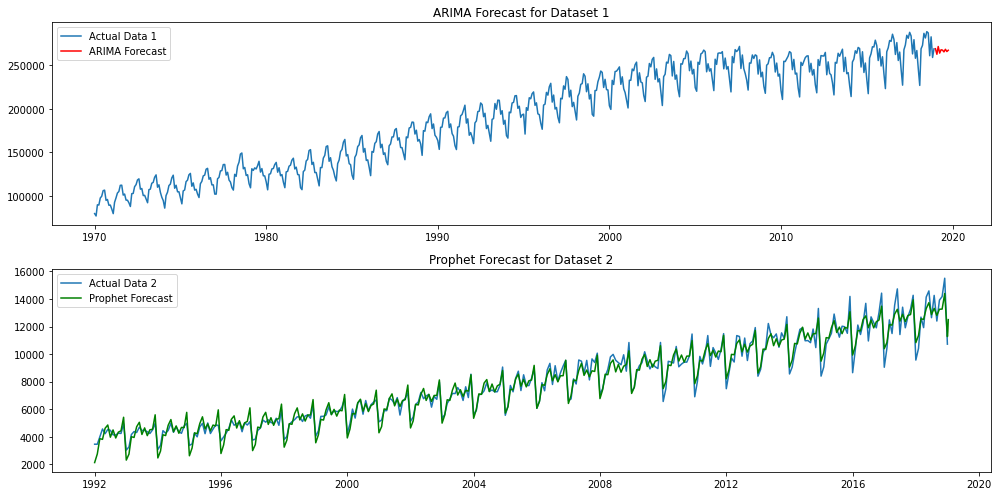

In [11]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data1.index, data1['TRFVOLUSM227NFWA'], label='Actual Data 1')
plt.plot(arima_forecast_data1.index, arima_forecast_data1, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast for Dataset 1')

plt.subplot(2, 1, 2)
plt.plot(data2['ds'], data2['y'], label='Actual Data 2')
plt.plot(prophet_forecast_data2['ds'], prophet_forecast_data2['yhat'], label='Prophet Forecast', color='green')
plt.legend()
plt.title('Prophet Forecast for Dataset 2')

plt.tight_layout()
plt.show()


In [ ]:
def evaluate_forecast(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    return rmse, mae

In [12]:
rmse_data1, mae_data1 = evaluate_forecast(data1['TRFVOLUSM227NFWA'][-10:], arima_forecast_data1)
print(f'ARIMA - Dataset 1: RMSE={rmse_data1}, MAE={mae_data1}')
rmse_data2, mae_data2 = evaluate_forecast(data2['y'][-10:], prophet_forecast_data2['yhat'][-10:])
print(f'Prophet - Dataset 2: RMSE={rmse_data2}, MAE={mae_data2}')


ARIMA - Dataset 1: RMSE=13094.161709867367, MAE=10996.579695685568
Prophet - Dataset 2: RMSE=2178.725353845115, MAE=1975.4633218843542
